In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np
import logging
import matplotlib.pyplot as plt

# Load data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
NUM_CLASSES = 10

class_names = ['airplane', 'automobile', 'bird',  'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

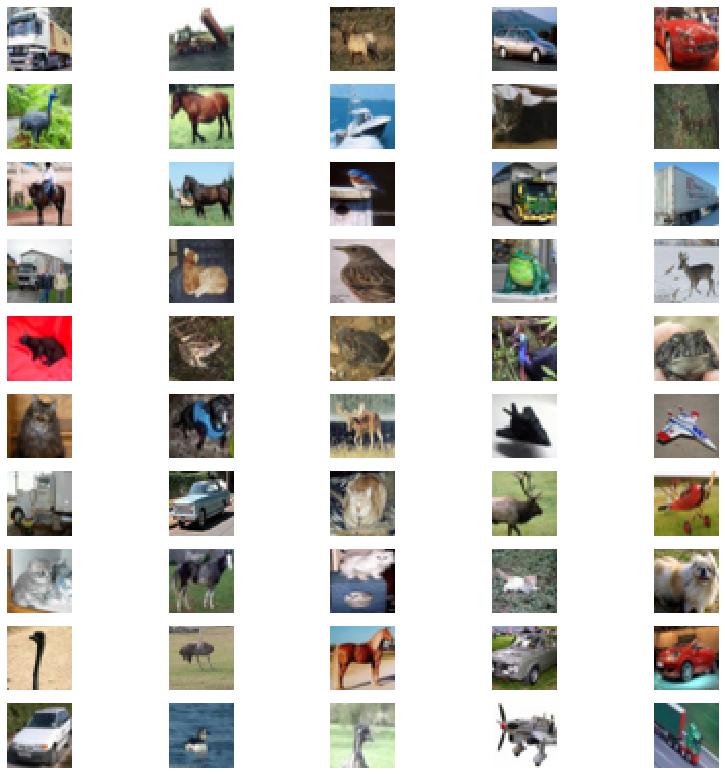

In [4]:
k = 0
plt.figure(figsize=(14, 14)) 
for i in range(10):
    for j in range(5):
        k += 1
        plt.subplot2grid((10,5), (i,j))
        plt.imshow(X_train[k])
        plt.axis('off')
plt.show()

## Build the model

In [5]:
input_layer = tf.keras.layers.Input(shape=(32, 32, 3))

x = tf.keras.layers.Flatten()(input_layer)
x = tf.keras.layers.Dense(units=200, activation='relu')(x)
x = tf.keras.layers.Dense(units=150, activation='relu')(x)

output_layer = tf.keras.layers.Dense(units=10, activation = 'softmax')(x)

In [6]:
model = tf.keras.Model(input_layer, output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.0005), metrics=['accuracy'])

## Training

In [8]:
model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 182us/sample - loss: 1.8391 - accuracy: 0.3367
Epoch 2/10
50000/50000 [==============================] - 6s 120us/sample - loss: 1.6532 - accuracy: 0.4116
Epoch 3/10
50000/50000 [==============================] - 5s 108us/sample - loss: 1.5811 - accuracy: 0.4343
Epoch 4/10
50000/50000 [==============================] - 6s 122us/sample - loss: 1.5308 - accuracy: 0.4546
Epoch 5/10
50000/50000 [==============================] - 6s 120us/sample - loss: 1.4951 - accuracy: 0.4666
Epoch 6/10
50000/50000 [==============================] - 6s 121us/sample - loss: 1.4620 - accuracy: 0.4789
Epoch 7/10
50000/50000 [==============================] - 6s 110us/sample - loss: 1.4382 - accuracy: 0.4876
Epoch 8/10
50000/50000 [==============================] - 5s 103us/sample - loss: 1.4131 - accuracy: 0.4956
Epoch 9/10
50000/50000 [==============================] - 5s 105us/sample - loss: 1.3919 - accuracy: 0.5021
Epoch

In [9]:
model.evaluate(X_test, y_test, verbose=False)

[1.422562310409546, 0.4942]